Dataset from kaggle:https://www.kaggle.com/datasets/abhinav89/telecom-customer?resource=download
Target variable is churn, the goal is to predict whether the customer will churn or not

In [4]:
# !pip install skfeature-chappers

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.linear_model import Lasso
from numpy import arange
from skfeature.function.similarity_based import fisher_score

In [92]:
data =  pd.read_csv('archive/Telecom_customer churn.csv')

In [93]:
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [94]:
len(data)

100000

In [95]:
data.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

In [96]:
data['Customer_ID'].nunique()

100000

In [97]:
data[ 'churn'].value_counts()

0    50438
1    49562
Name: churn, dtype: int64

Conclusion: The dataset is rather balanced

# Encoding categorical features

In [98]:
#Check wheather there are any columns containing string values
data.select_dtypes(include='O')

,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,U,A,N,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,WCMB,O,S,...,M,C,A,N,U,U,U,U,U,Y
1,N,EA,N,U,CHICAGO AREA,N,N,WC,NaN,S,...,M,C,A,Z,U,U,U,U,U,Y
2,Y,C,N,S,GREAT LAKES AREA,N,N,NaN,O,S,...,M,C,A,N,U,Y,U,U,U,Y
3,Y,B,N,T,CHICAGO AREA,N,N,NaN,NaN,M,...,M,C,D,U,Y,U,U,U,U,Y
4,Y,A,N,U,NEW ENGLAND AREA,Y,N,WCMB,R,M,...,M,C,O,I,U,U,U,U,U,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,U,B,N,U,LOS ANGELES AREA,N,N,WC,O,S,...,M,NaN,A,S,U,U,U,Y,U,Y
99996,U,CY,Y,S,LOS ANGELES AREA,N,N,WC,O,S,...,M,I,A,N,U,U,Y,Y,Y,Y
99997,U,DA,N,U,SOUTHWEST AREA,Y,N,WCMB,NaN,NaN,...,M,NaN,NaN,U,Y,Y,U,U,U,N
99998,U,EA,N,U,SOUTHWEST AREA,Y,N,WCMB,NaN,NaN,...,NaN,NaN,NaN,S,U,U,U,U,U,N


In [99]:
#Check wheather there are any columns containing bool values
data.select_dtypes(include='bool')

""
0
1
2
3
4
...
99995
99996
99997
99998


In [100]:
le = LabelEncoder()
label_encoded_df = data.copy()

#select all columns that contain strings
for col in label_encoded_df.select_dtypes(include='O').columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])

In [101]:
#Dealing with NaNs

#Check how many NaN's there are
label_encoded_df.isna().sum()[50:]

# Replace NaN values with the mean of each column
label_encoded_df_na_replaced = label_encoded_df.fillna(label_encoded_df.mean())

In [102]:
#Scale the features
scaler=MinMaxScaler()
label_encoded_df_na_replaced_normalized = pd.DataFrame(scaler.fit_transform(label_encoded_df_na_replaced), columns=label_encoded_df_na_replaced.columns)

In [103]:
# separating features and a target variable
X = label_encoded_df_na_replaced_normalized.drop(['churn'], axis=1)
y = label_encoded_df_na_replaced_normalized.loc[:, 'churn']

In [104]:
# y = y.astype(int)

In [105]:
label_encoded_df_na_replaced_normalized

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,0.007836,0.017961,0.113102,0.001553,0.000000,0.000000,0.000000,0.000000,0.000000,0.105936,...,0.0,0.529412,0.0,0.0,0.0,0.0,0.0,0.5,0.200219,0.00000
1,0.016538,0.039548,0.147263,0.001553,0.005265,0.008255,0.010155,0.000000,0.000000,0.125583,...,0.0,0.941176,0.0,0.0,0.0,0.0,0.0,0.5,0.134026,0.00001
2,0.006016,0.000840,0.100491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110296,...,0.0,0.529412,0.0,0.5,0.0,0.0,0.0,0.5,0.825492,0.00002
3,0.011474,0.000614,0.148579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110374,...,0.0,0.823529,0.5,0.0,0.0,0.0,0.0,0.5,0.993982,0.00003
4,0.015950,0.046736,0.226354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111514,...,0.0,0.352941,0.0,0.0,0.0,0.0,0.0,0.5,0.240153,0.00004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.110020,...,0.0,0.764706,0.0,0.0,0.0,0.5,0.0,0.5,0.425602,0.99996
99996,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.110020,...,0.0,0.529412,0.0,0.0,0.5,0.5,0.5,0.5,0.459519,0.99997
99997,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.110020,...,0.0,0.823529,0.5,0.5,0.0,0.0,0.0,0.0,0.239606,0.99998
99998,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.110020,...,0.0,0.764706,0.0,0.0,0.0,0.0,0.0,0.0,0.043764,0.99999


# Feature Importance

In [106]:
#Let's drop the customer id column, it doesn't make sense to use it as a feature
X.drop(['Customer_ID'], axis=1, inplace=True)

# Random Forrest importance

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
model = RandomForestClassifier(n_estimators=300)

In [109]:
#fit the model
model.fit(X, y)

#get the importances
importances=model.feature_importances_

In [110]:
X

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,0.007836,0.017961,0.113102,0.001553,0.000000,0.000000,0.000000,0.000000,0.000000,0.105936,...,0.000000,0.0,0.529412,0.0,0.0,0.0,0.0,0.0,0.5,0.200219
1,0.016538,0.039548,0.147263,0.001553,0.005265,0.008255,0.010155,0.000000,0.000000,0.125583,...,0.000000,0.0,0.941176,0.0,0.0,0.0,0.0,0.0,0.5,0.134026
2,0.006016,0.000840,0.100491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110296,...,0.000000,0.0,0.529412,0.0,0.5,0.0,0.0,0.0,0.5,0.825492
3,0.011474,0.000614,0.148579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110374,...,0.200000,0.0,0.823529,0.5,0.0,0.0,0.0,0.0,0.5,0.993982
4,0.015950,0.046736,0.226354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111514,...,0.933333,0.0,0.352941,0.0,0.0,0.0,0.0,0.0,0.5,0.240153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.110020,...,0.000000,0.0,0.764706,0.0,0.0,0.0,0.5,0.0,0.5,0.425602
99996,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.110020,...,0.000000,0.0,0.529412,0.0,0.0,0.5,0.5,0.5,0.5,0.459519
99997,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.110020,...,1.000000,0.0,0.823529,0.5,0.5,0.0,0.0,0.0,0.0,0.239606
99998,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.110020,...,1.000000,0.0,0.764706,0.0,0.0,0.0,0.0,0.0,0.0,0.043764


In [111]:
#visualize the results
results = pd.DataFrame({"Features": X.columns, 'Importances': importances})

results.set_index('Importances')

#sort
results =  results.sort_values("Importances")



Text(0, 0.5, 'Importances')

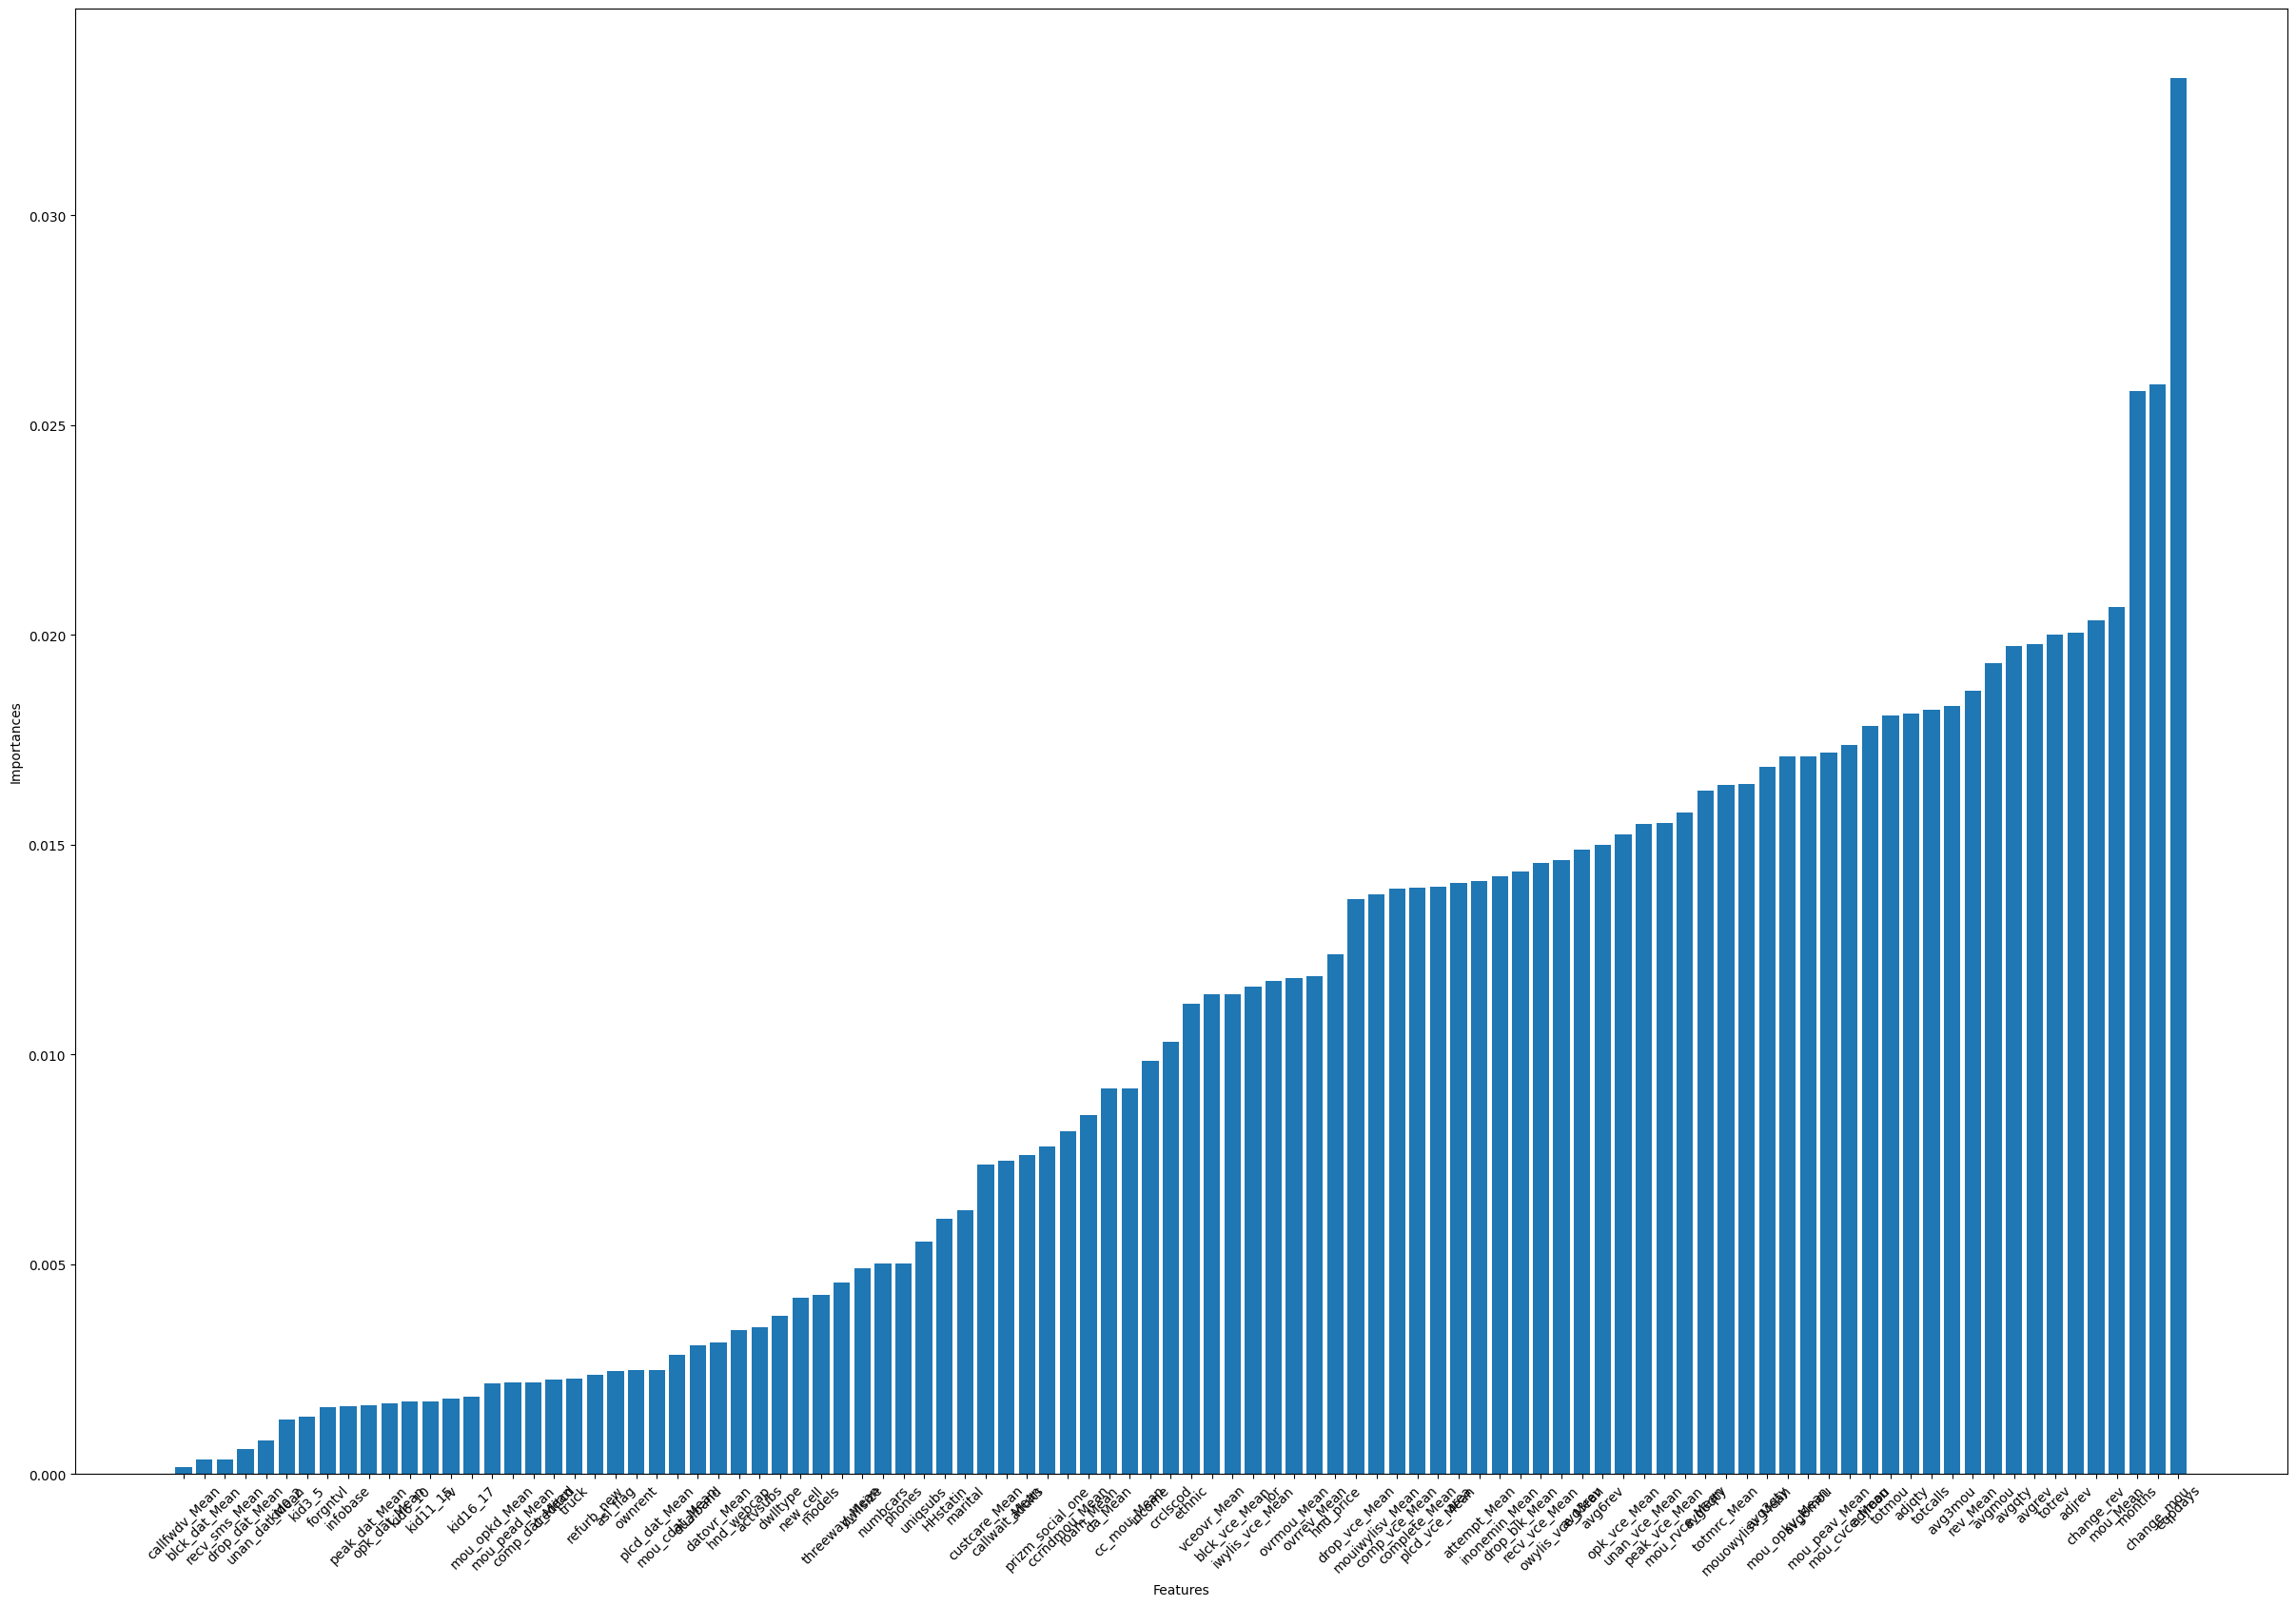

In [112]:
plt.figure(figsize=(30, 20))
plt.bar(results['Features'], results['Importances'])
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.ylabel('Importances')

There are too many features to visualize them properly, but what we can conclude from this plot is theat the first three features have significantly higher importance than the other features

In [113]:
len(results.loc[results['Importances']> 0.01, :])

50

There are 50 features with importance > 0.01, we will drop all features with importance lower than that

In [117]:
top_50 = results.loc[results['Importances']> 0.01, :]

Text(0, 0.5, 'Importances')

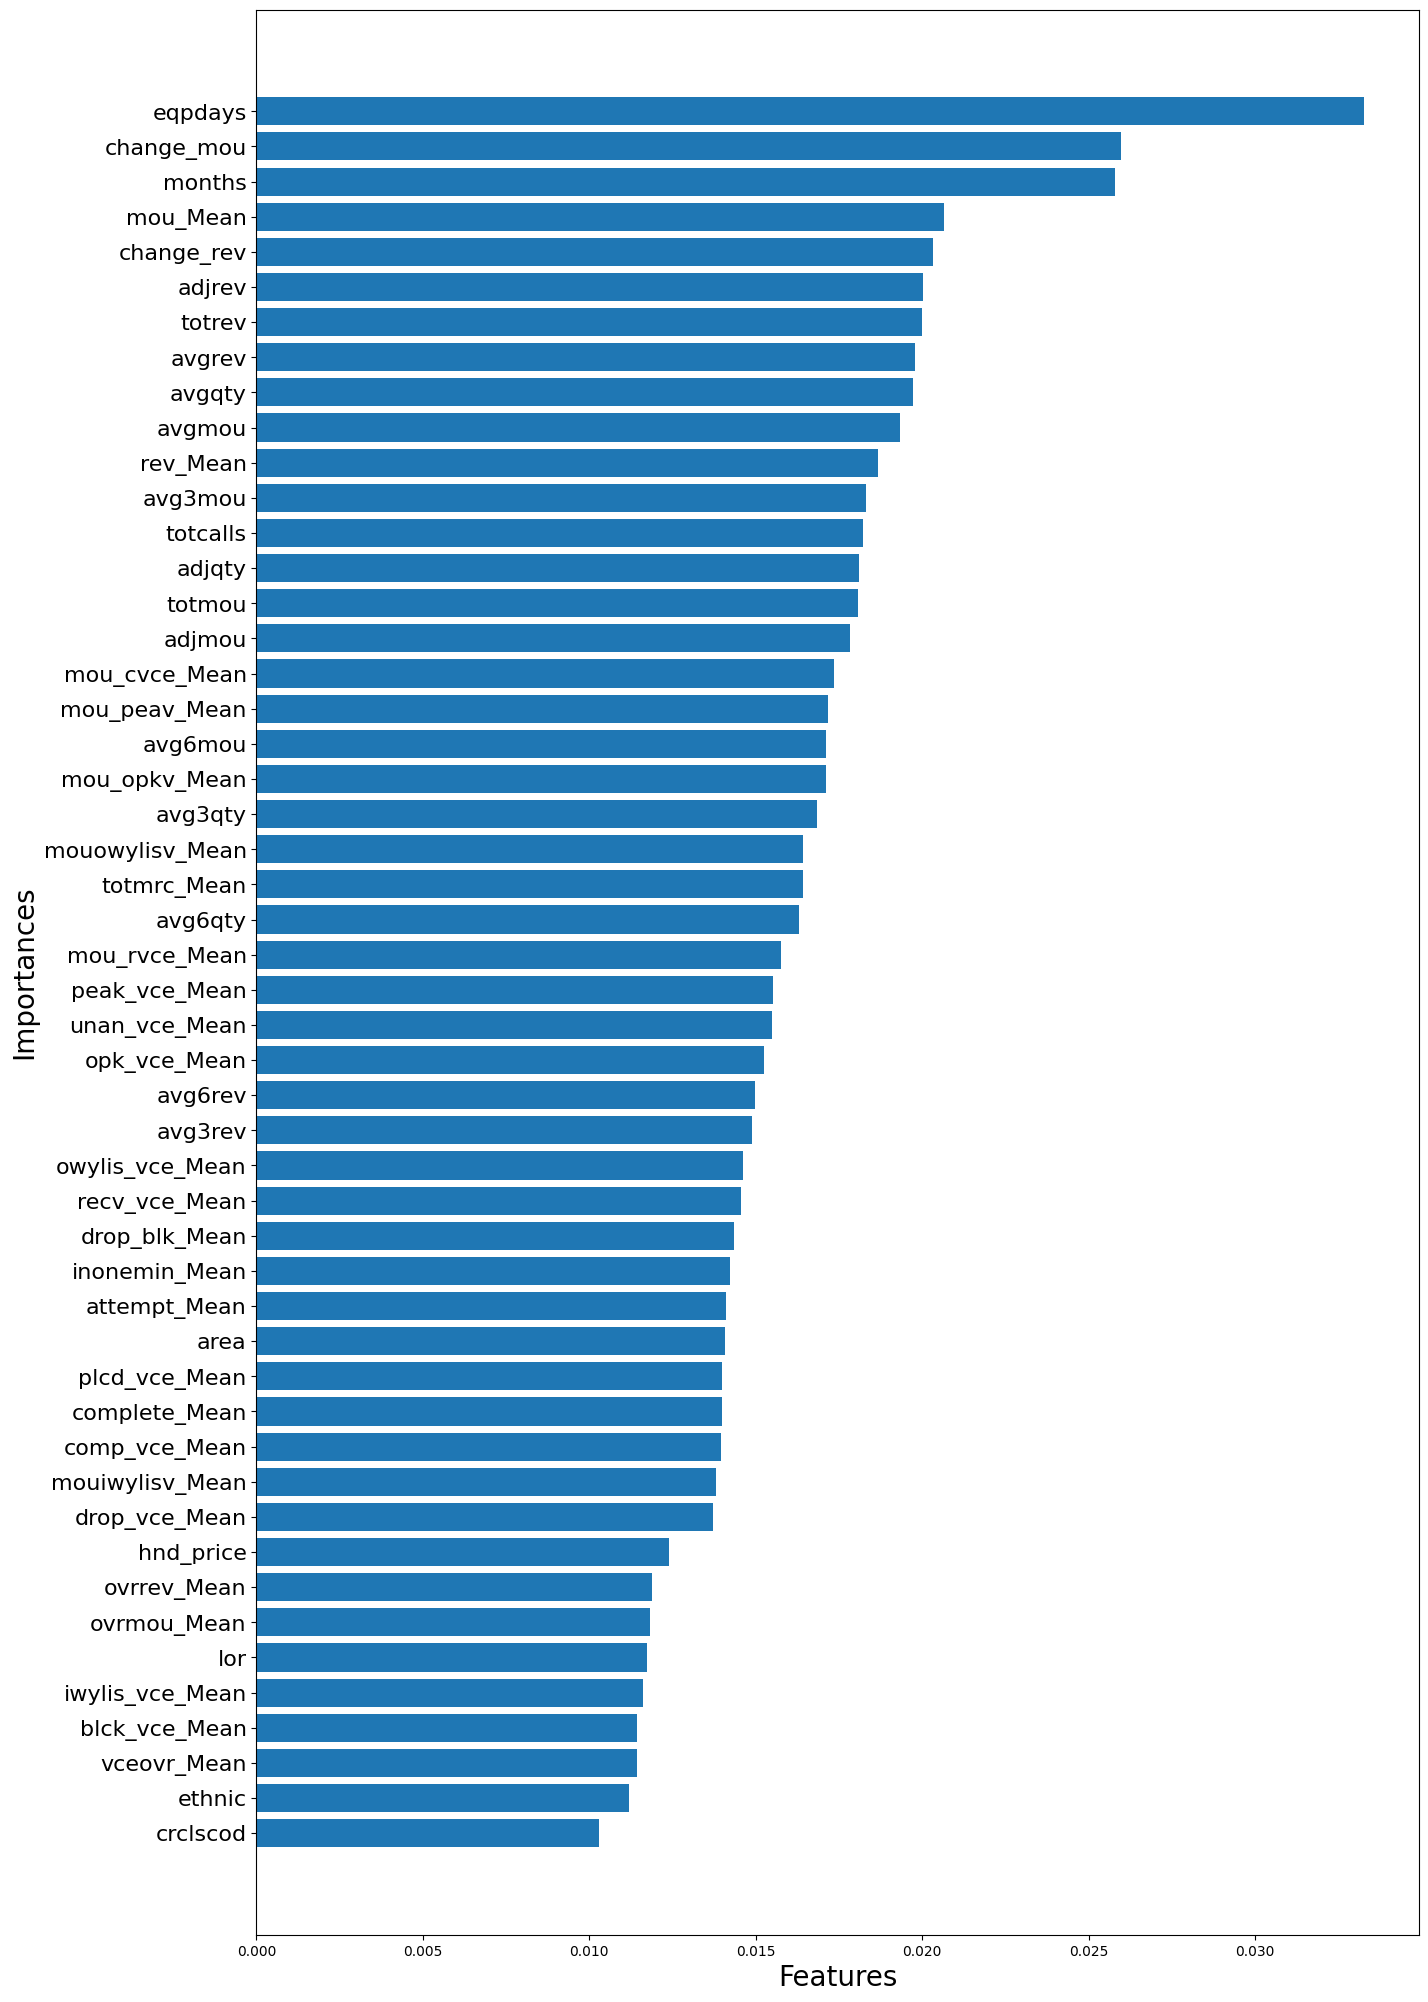

In [128]:
# Plotting 50 features
plt.figure(figsize=(15, 25))
plt.barh(top_50['Features'], top_50['Importances'])
plt.xlabel("Features", fontsize=20)
plt.yticks(fontsize=16)
plt.ylabel('Importances', fontsize=20)

The most important features are:
    1. Number of days (age) of current equipment
    2. Percentage change in monthly minutes of use vs previous three month average
    3. Total number of months in service
    4. Percentage change in monthly revenue vs previous three month average
    5. Mean number of monthly minutes of use

In [129]:
# selecting only those columns from the dataset which has importance >0.01

# creating list of columns selected
selected_cols = list(top_50['Features'].unique())

# adding target column
selected_cols = selected_cols + ['churn']

# selecting columns from the dataframe and assigning to a new dataframe
data2 = label_encoded_df_na_replaced_normalized.loc[:, selected_cols]

data2

,crclscod,ethnic,vceovr_Mean,blck_vce_Mean,iwylis_vce_Mean,lor,ovrmou_Mean,ovrrev_Mean,hnd_price,drop_vce_Mean,...,avgqty,avgrev,totrev,adjrev,change_rev,mou_Mean,months,change_mou,eqpdays,churn
0,0.000000,0.529412,0.000000,0.001730,0.000000,1.000000,0.000000,0.000000,0.285714,0.002865,...,0.010835,0.031587,0.054945,0.053605,0.098338,0.017961,1.000000,0.105936,0.200219,1.0
1,0.396226,0.941176,0.010155,0.002595,0.012195,0.066667,0.005265,0.008255,0.187522,0.035817,...,0.088127,0.055261,0.104255,0.104603,0.104660,0.039548,0.909091,0.125583,0.134026,0.0
2,0.132075,0.529412,0.000000,0.000000,0.000000,0.466667,0.000000,0.000000,0.040816,0.001433,...,0.046687,0.036870,0.078786,0.071376,0.100054,0.000840,0.945455,0.110296,0.825492,1.0
3,0.075472,0.823529,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.040816,0.000000,...,0.010212,0.043267,0.073112,0.071647,0.100054,0.000614,0.981818,0.110374,0.993982,0.0
4,0.000000,0.352941,0.000000,0.001730,0.001284,0.333333,0.000000,0.000000,0.285714,0.041547,...,0.026350,0.041362,0.079709,0.079947,0.100054,0.046736,0.927273,0.111514,0.240153,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.075472,0.764706,0.014837,0.000000,0.000000,1.000000,0.009506,0.012300,0.040816,0.008596,...,0.059202,0.079953,0.058247,0.057584,0.099962,0.042072,0.345455,0.110020,0.425602,1.0
99996,0.226415,0.529412,0.014837,0.002595,0.000000,0.600000,0.009506,0.012300,0.040816,0.012894,...,0.060140,0.078059,0.055402,0.053547,0.099962,0.042072,0.381818,0.110020,0.459519,0.0
99997,0.320755,0.823529,0.014837,0.000000,0.000000,0.411816,0.009506,0.012300,0.387755,0.000000,...,0.021597,0.059646,0.040679,0.038920,0.099962,0.042072,0.454545,0.110020,0.239606,0.0
99998,0.396226,0.764706,0.014837,0.001730,0.032092,0.411816,0.009506,0.012300,0.285714,0.080229,...,0.156584,0.133158,0.097575,0.095714,0.099962,0.042072,0.345455,0.110020,0.043764,0.0


In [160]:
#select only those column which have correlation with the target variable > 0.04
corrs = pd.DataFrame(data2.corr()['churn'].sort_values())
corrs_list = corrs.loc[abs(corrs['churn']) > 0.04, 'churn'].index.tolist()


data3 = data2.loc[:, corrs_list]
data3

,hnd_price,totmrc_Mean,mou_Mean,mou_cvce_Mean,complete_Mean,comp_vce_Mean,avg3mou,mou_opkv_Mean,attempt_Mean,plcd_vce_Mean,...,opk_vce_Mean,mou_peav_Mean,mou_rvce_Mean,avg3qty,avg6mou,owylis_vce_Mean,recv_vce_Mean,iwylis_vce_Mean,eqpdays,churn
0,0.285714,0.113102,0.017961,0.020078,0.023755,0.023755,0.035251,0.012730,0.022863,0.022863,...,0.014604,0.033023,0.029562,0.029675,0.044617,0.000000,0.012564,0.000000,0.200219,1.0
1,0.187522,0.147263,0.039548,0.041953,0.102059,0.102059,0.039528,0.039038,0.115043,0.115043,...,0.095538,0.018761,0.016816,0.040420,0.066094,0.071909,0.020479,0.012195,0.134026,0.0
2,0.040816,0.100491,0.000840,0.001202,0.003167,0.003167,0.001555,0.000054,0.003932,0.003932,...,0.000609,0.001293,0.000000,0.001791,0.001524,0.000000,0.000099,0.000000,0.825492,1.0
3,0.040816,0.148579,0.000614,0.001863,0.001936,0.001936,0.001037,0.001256,0.001602,0.001602,...,0.002231,0.000842,0.000126,0.000767,0.006928,0.000517,0.000396,0.000000,0.993982,0.0
4,0.285714,0.226354,0.046736,0.063182,0.072321,0.072321,0.072317,0.050275,0.097131,0.097131,...,0.054970,0.043203,0.032346,0.048862,0.081197,0.022763,0.028097,0.001284,0.240153,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.040816,0.167300,0.042072,0.021014,0.023931,0.023931,0.053136,0.016901,0.023882,0.023882,...,0.016227,0.005869,0.000613,0.030954,0.083553,0.004139,0.000890,0.000000,0.425602,1.0
99996,0.040816,0.167300,0.042072,0.022319,0.028154,0.028154,0.049508,0.000088,0.030290,0.030290,...,0.000609,0.030331,0.006514,0.032233,0.056810,0.010347,0.004551,0.000000,0.459519,0.0
99997,0.387755,0.167300,0.042072,0.000000,0.000000,0.000000,0.085796,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.021745,0.098656,0.000000,0.000000,0.000000,0.239606,0.0
99998,0.285714,0.167300,0.042072,0.124984,0.220306,0.220130,0.133618,0.058529,0.240716,0.240571,...,0.101826,0.159695,0.100659,0.115119,0.130664,0.085360,0.097052,0.032092,0.043764,0.0


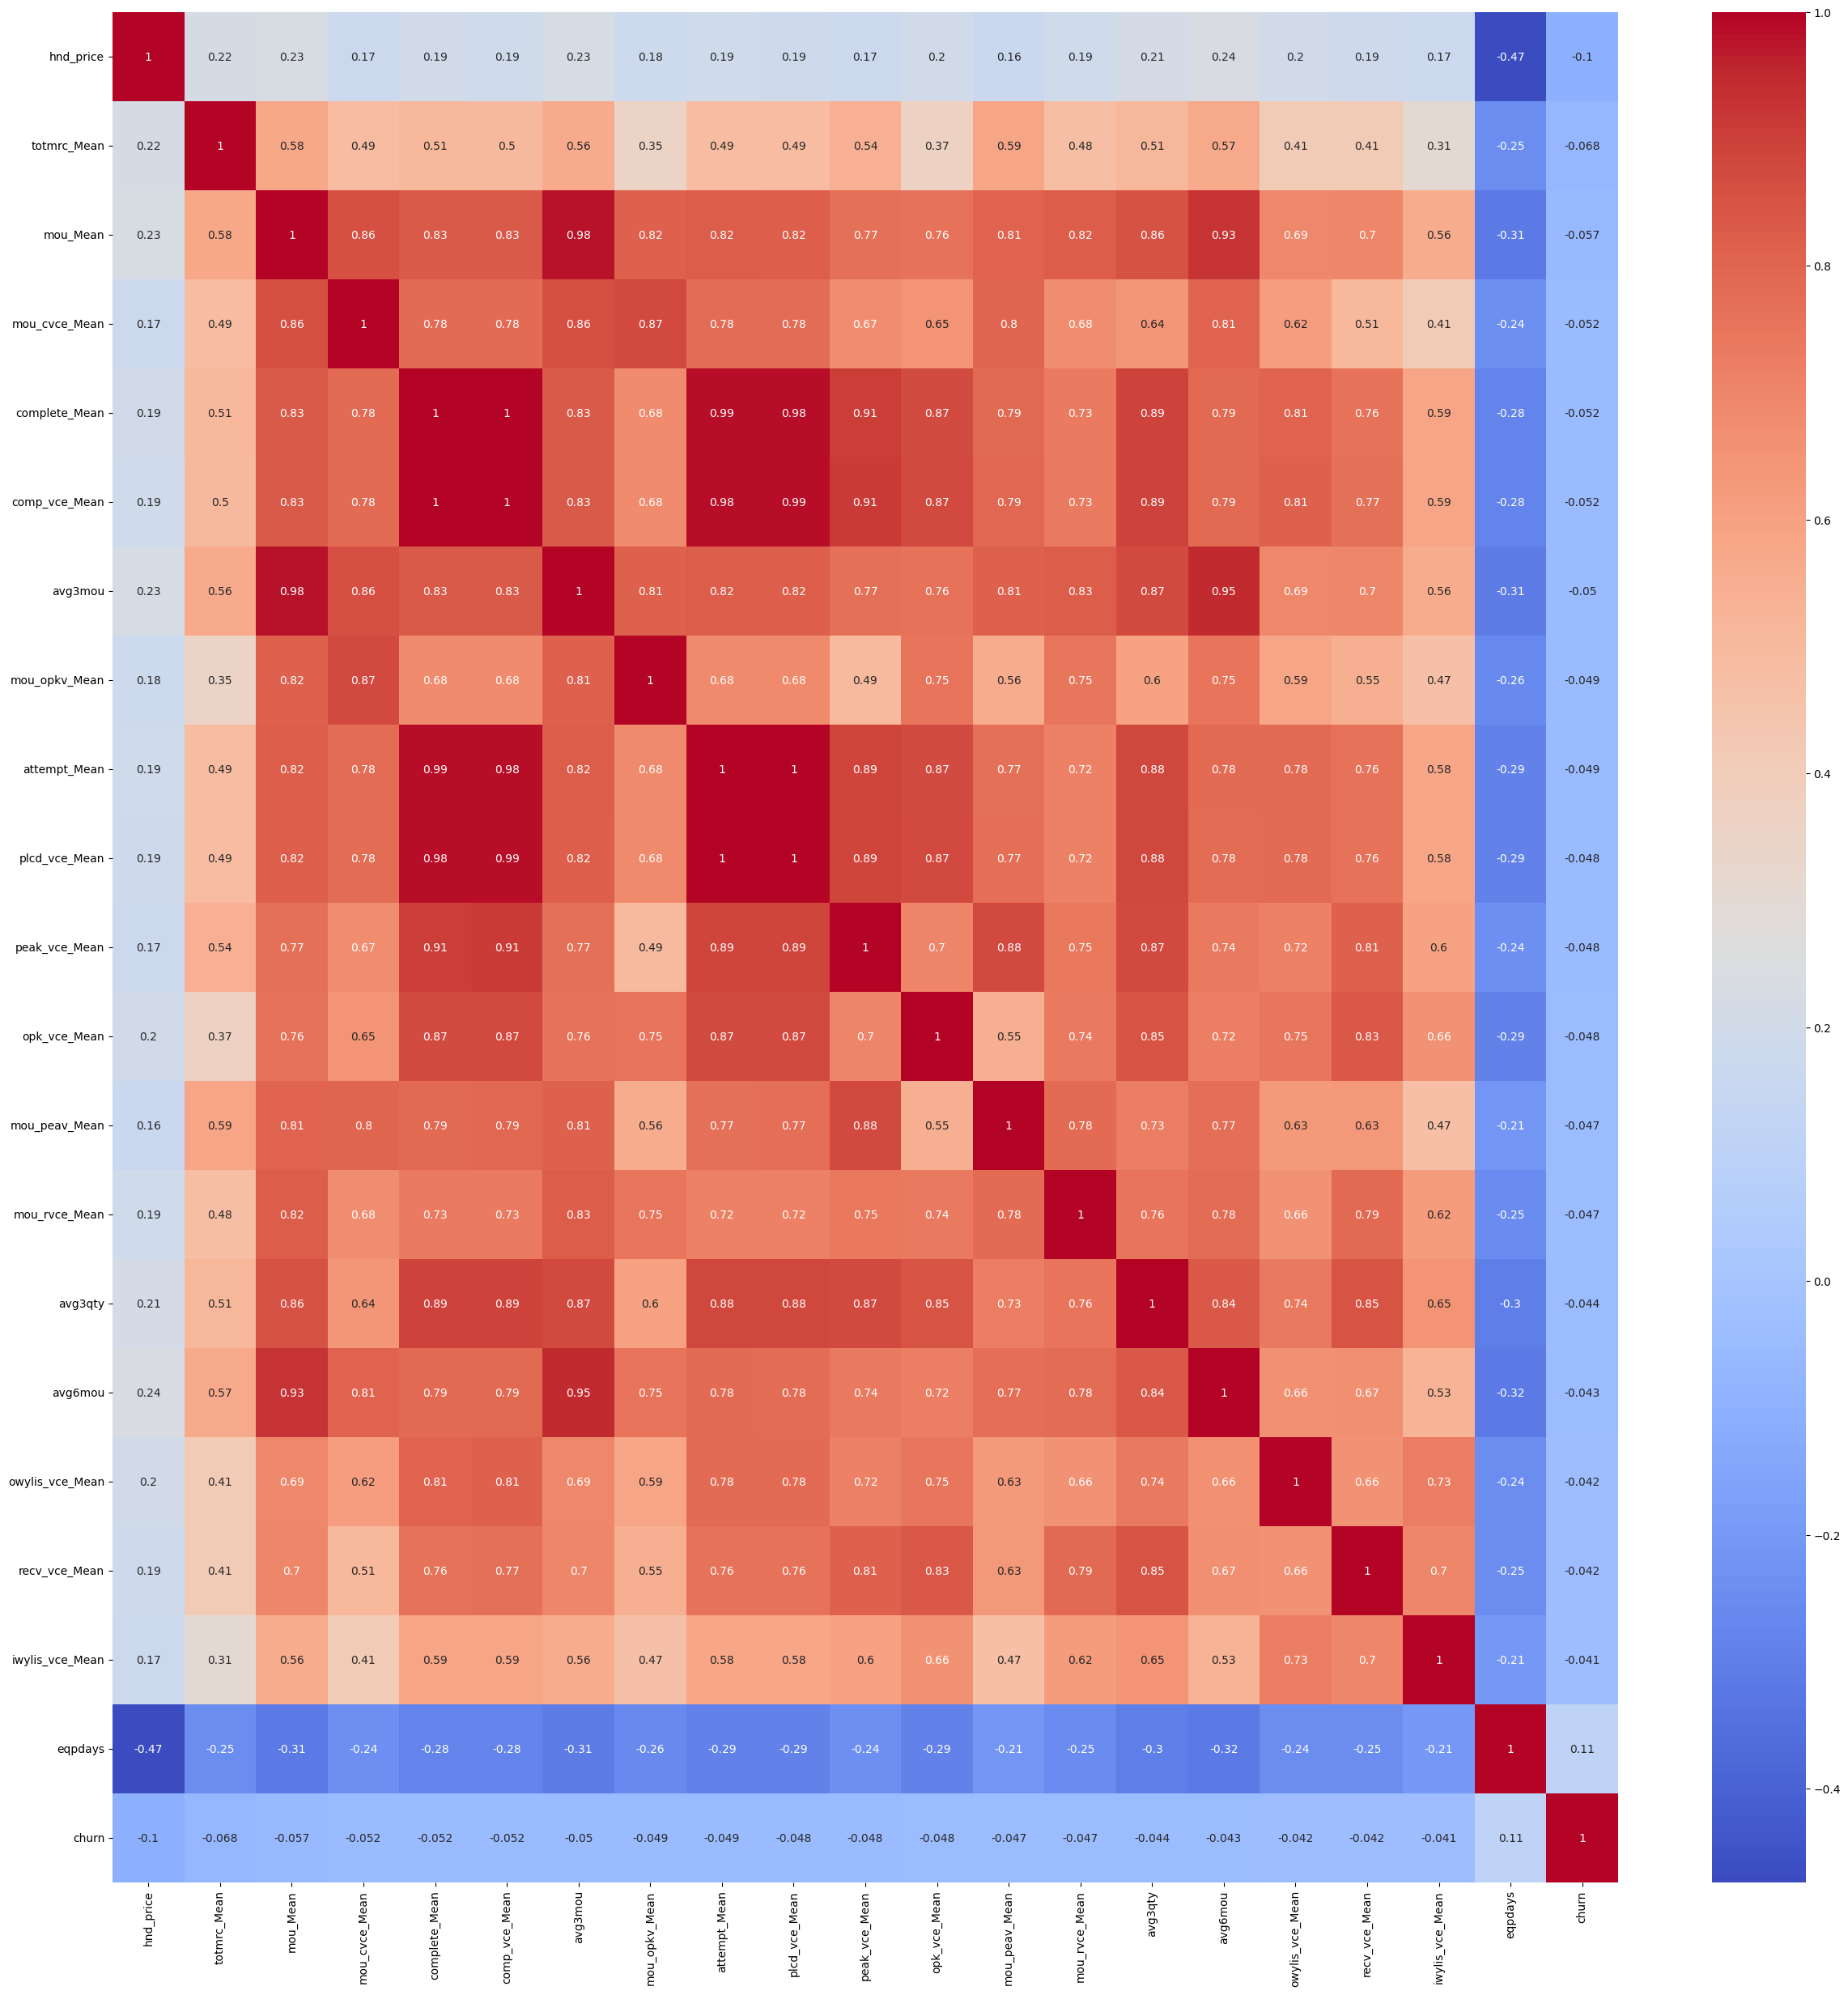

In [161]:
# Visualize correlation plot
correlation_matrix = data3.corr()


plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()